In [ ]:
#use distplot to see if they fit a normal or exponential distribution
#then do transformations and plot again to see if there is a difference

## Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

Instructions <br>
1. Get the numerical variables from our dataset.<br>
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.<br>
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Read the data from the file

In [2]:
data = pd.read_csv('/Users/KirstyG/Desktop/Ironhack/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Take a look at the data

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# number of open complaints and number of policies shouls be categorical
data[['Number of Open Complaints', 'Number of Policies']] = data[['Number of Open Complaints', 'Number of Policies']].astype(str)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 1. Get the numerical variables from our dataset.

In [6]:
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

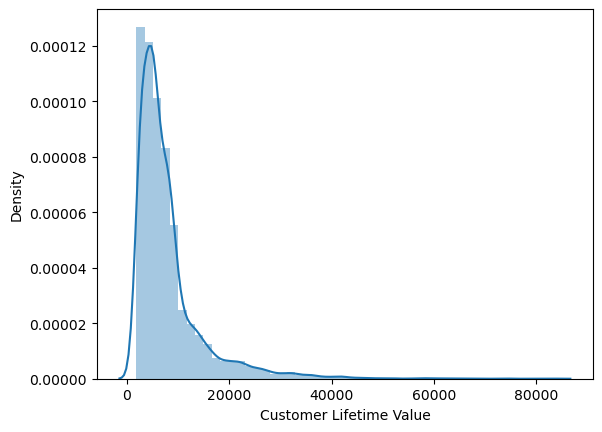

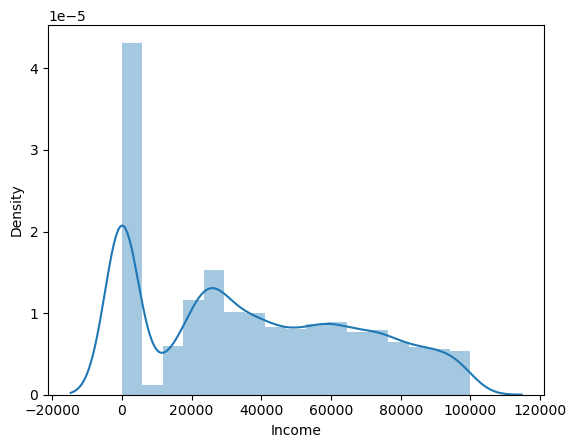

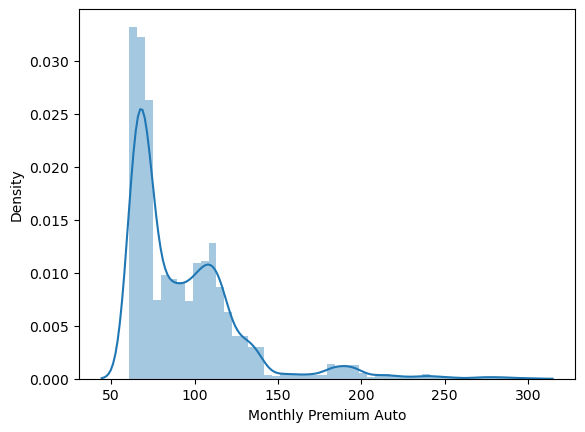

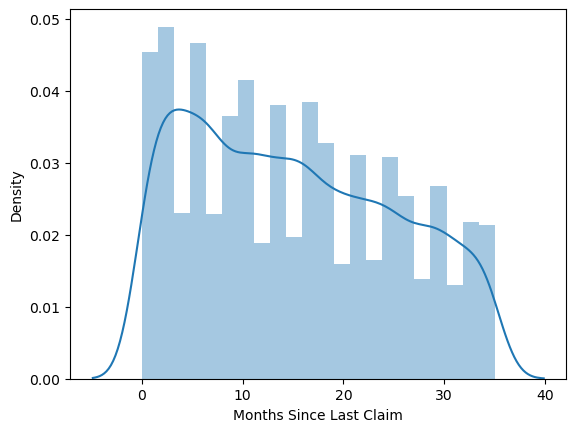

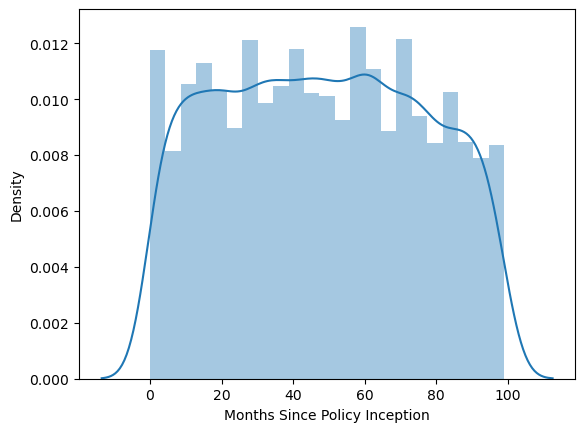

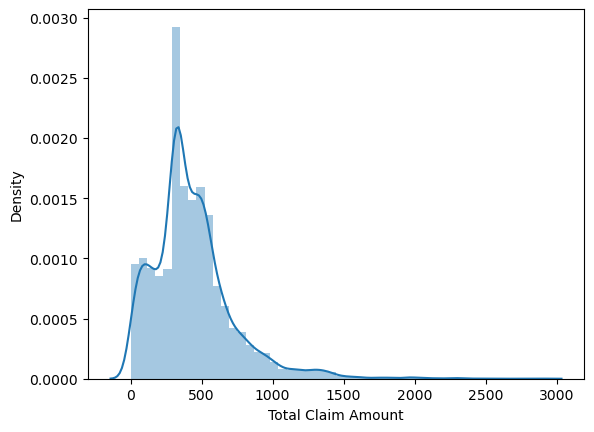

In [7]:
for col in numericals:
    sns.distplot(data[col])
    plt.show()

Disucss:

Only 'Months Since Last Claim' and 'Months Since Policy Inception' have a theoretical normal distribution, but not that much. The other variables have exponential distribution

## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

#### We will first apply MinMax Scaler

In [8]:
numericals_minmax = numericals.copy()

transformer = MinMaxScaler().fit(numericals_minmax)
X_minmax = transformer.transform(numericals_minmax)
X_minmax

array([[0.01062925, 0.56284694, 0.03375527, 0.91428571, 0.05050505,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, 0.37142857, 0.42424242,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, 0.51428571, 0.38383838,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, 0.25714286, 0.37373737,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, 0.97142857, 0.03030303,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, 0.08571429, 0.90909091,
        0.12771622]])

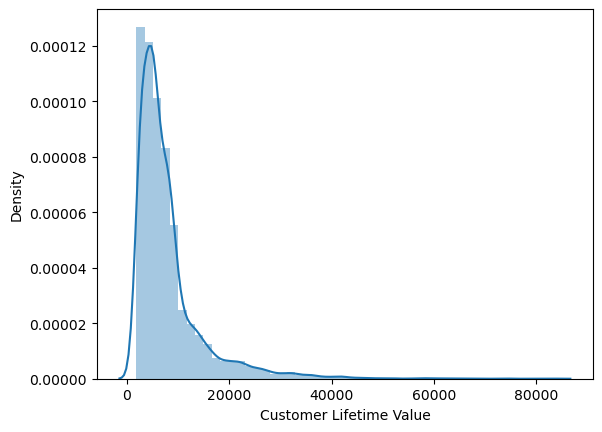

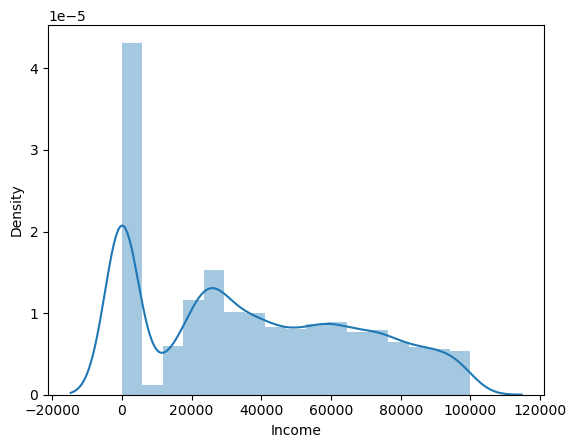

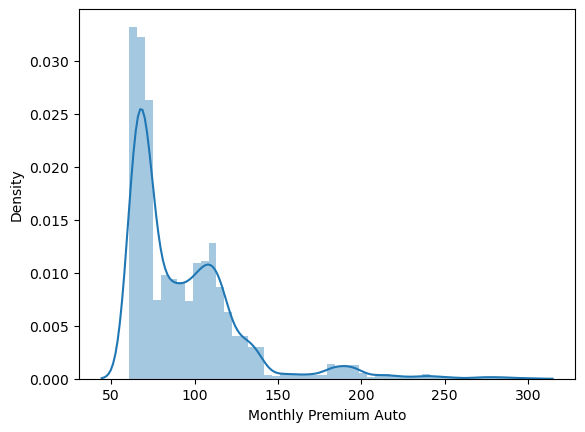

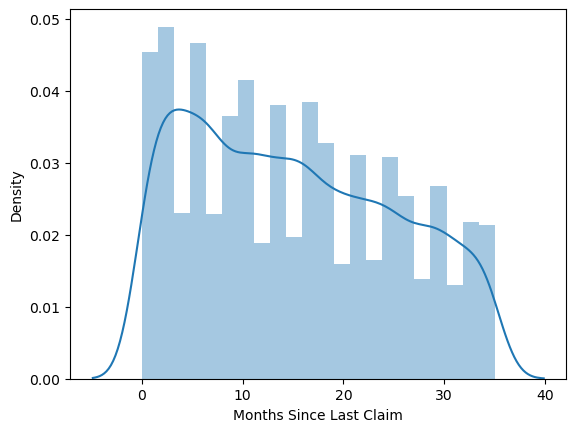

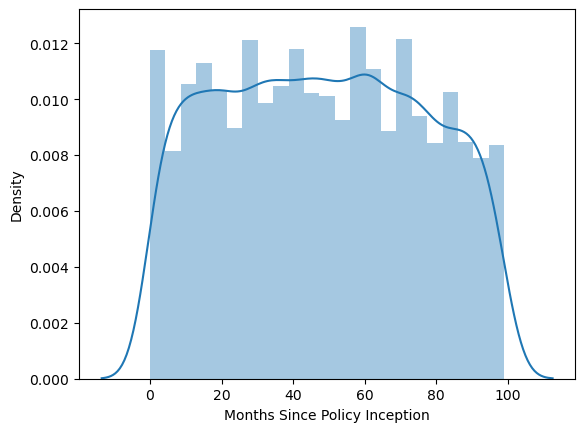

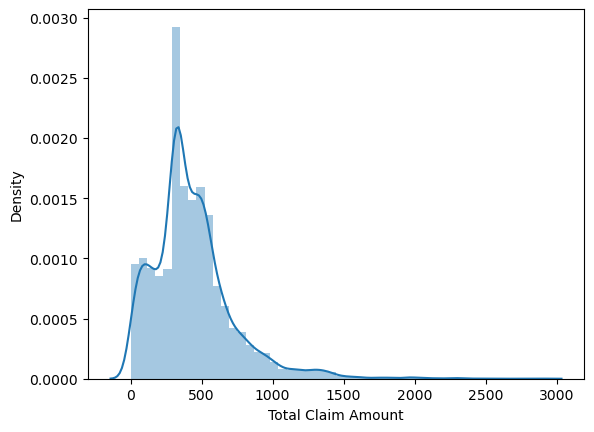

In [9]:
for col in numericals:
    sns.distplot(numericals_minmax[col])
    plt.show()

#### Next is log transformation

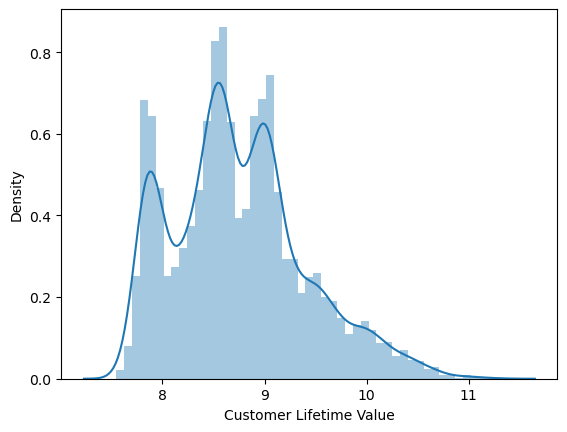

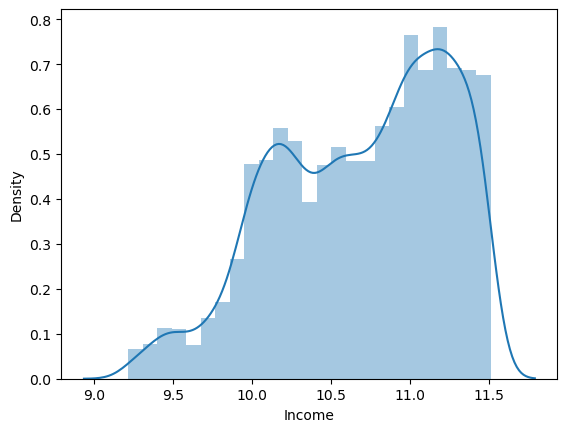

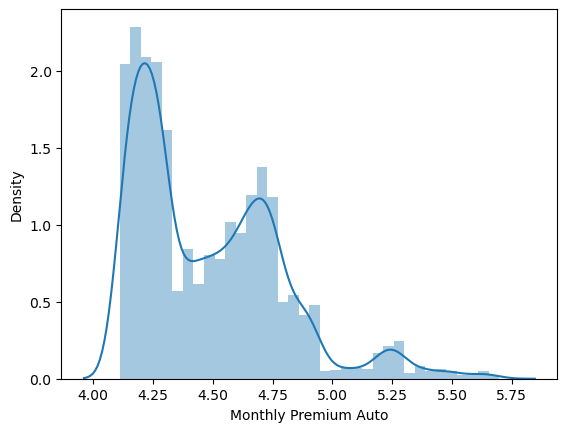

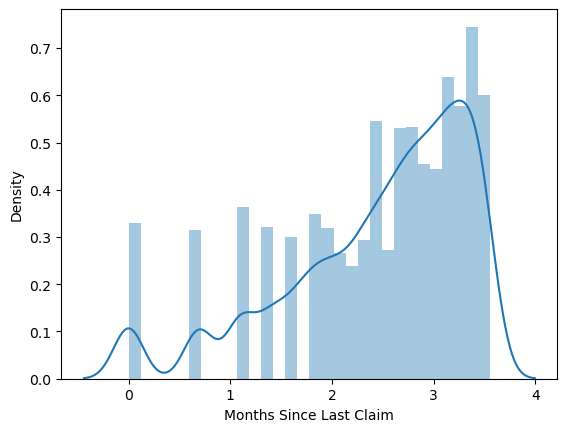

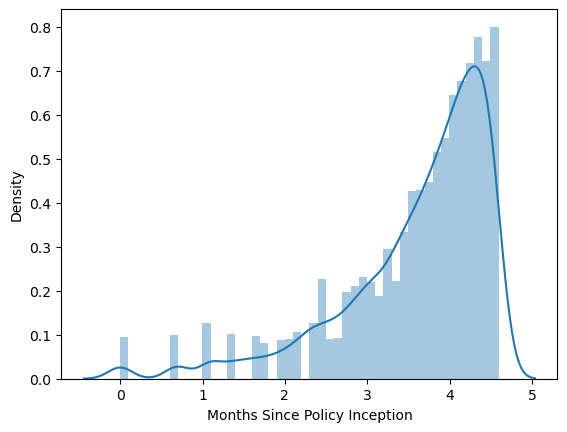

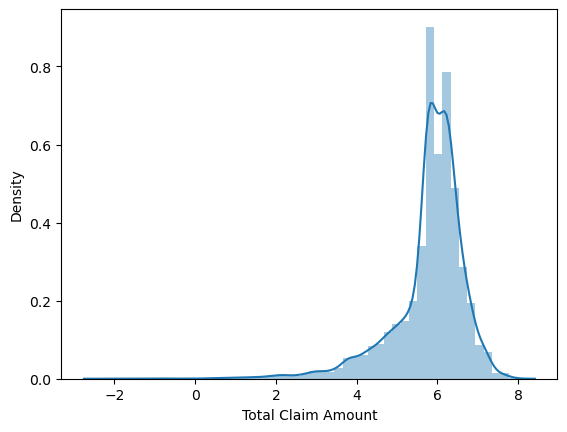

In [12]:
numericals_log = numericals.copy()

def log_tranform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
    
for col in numericals:
    numericals_log[col] = list(map(log_tranform_clean, numericals_log[col]))
    sns.distplot(numericals_log[col])
    plt.show()

#### Box cox transformation

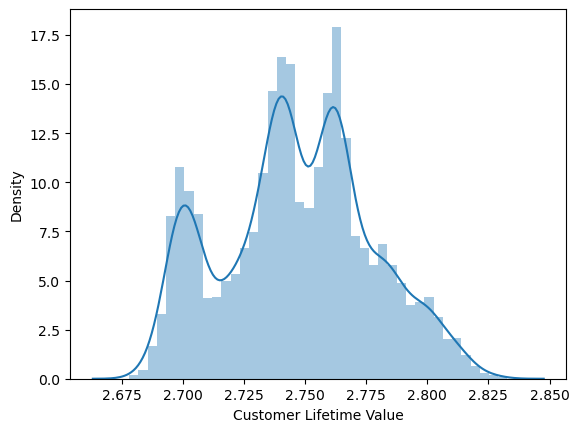

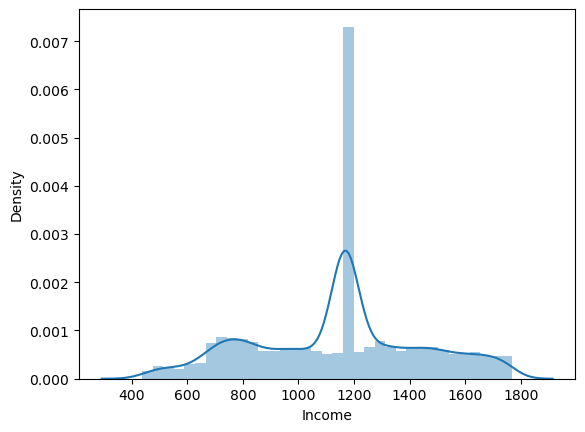

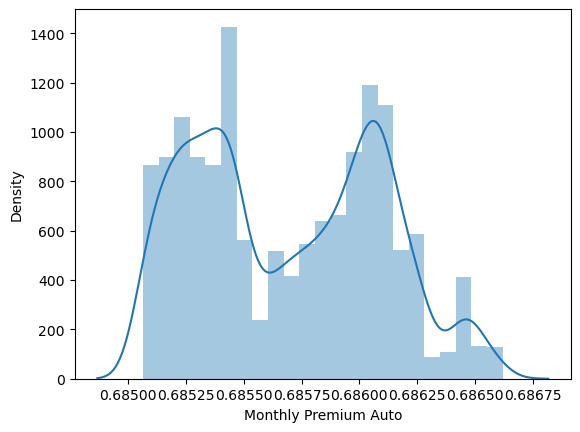

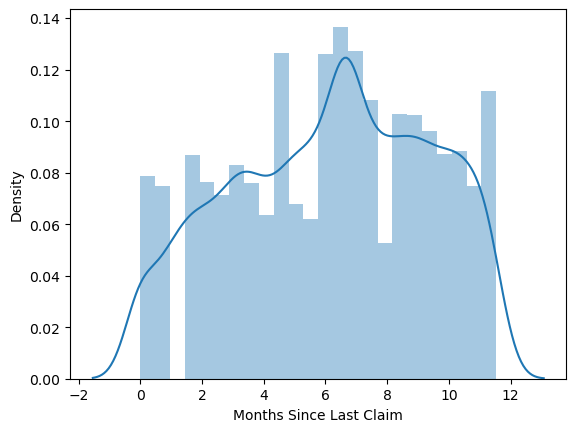

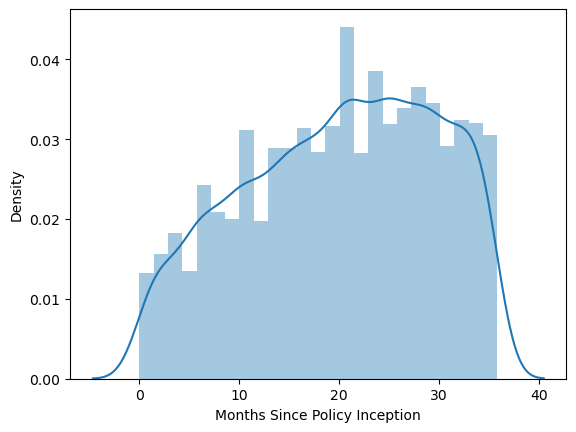

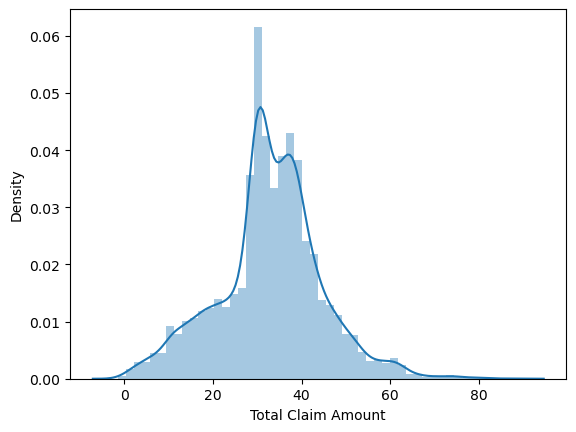

In [13]:
numericals_boxcox = numericals.copy()

def boxcox_transform(df):
    for col in df:
        df[col] = np.where(df[col] <= 0, np.NAN, df[col]) 
        df[col] = df[col].fillna(df[col].mean())
        transformed_data, _ = stats.boxcox(df[col])
        df[col] = transformed_data
    return df

numericals_boxcox = boxcox_transform(numericals_boxcox)

for col in numericals:
    sns.distplot(numericals_boxcox[col])
    plt.show()

In [14]:
numericals_boxcox = numericals.copy()

def boxcox_transform(df):
    numeric_cols = numericals_boxcox.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        numericals_boxcox[column] = np.where(numericals_boxcox[column]<=0, np.NAN, numericals_boxcox[column]) 
        numericals_boxcox[column] = numericals_boxcox[column].fillna(numericals_boxcox[column].mean())
        transformed_data, ci = stats.boxcox(numericals_boxcox[column])
        numericals_boxcox[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(numericals_boxcox)

NameError: name 'df_trans' is not defined

In this case Box Cox is the best method 